In [6]:
from typing import List
import logging
from dataclasses import dataclass
from pathlib import Path

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

import Bio
import Bio.PDB
import Bio.SVDSuperimposer

# from utils import *
import utils

In [2]:
df = utils.get_dataset_summary()
print(f"""
    - Shape: {df.shape}
    - #engineered: {(df.engineered == True).sum()}
""")
df.head(3)


    - Shape: (398, 3)
    - #engineered: 361



,Hchain,Lchain,engineered
pdb,,,
6eyn,D,C,True
5bq7,A,B,True
1vge,H,L,True


In [3]:
NUM_SAMPLES = 10000
FORCE_EXEC = False
res_path = Path(f"results/results_N{NUM_SAMPLES}.csv")
if res_path.exists() and (not FORCE_EXEC):
    res = pd.read_csv(res_path)
else:
    res = utils.compute_rmsd_dataset(df, NUM_SAMPLES)
    res.to_csv(res_path) 

res.head(3)

,Unnamed: 0,pdb1,pdb2,rmsd_h12,rmsd_l12,engineered_1,engineered_2
0,0,5i1h,5ibu,7.970605,3.074223,True,True
1,1,4fqh,4hqq,4.278498,5.556126,True,True
2,2,4f57,4p9m,7.993996,5.160216,False,True


In [4]:
utils.annotate_engineered_status(res)

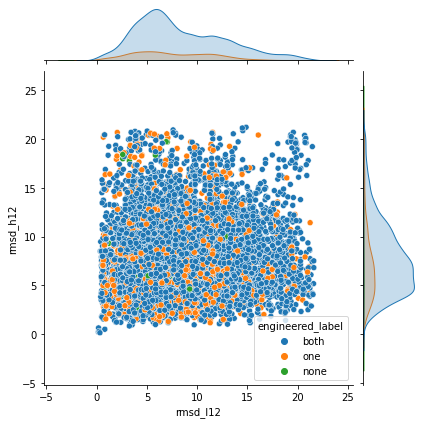

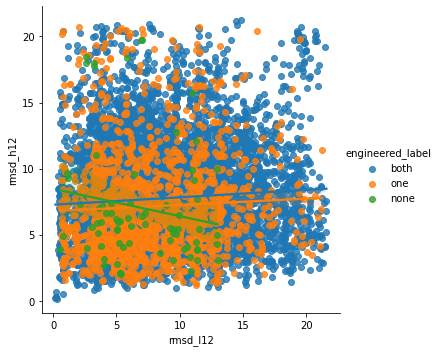

In [5]:
sns.jointplot(data=res, x='rmsd_l12', y='rmsd_h12', hue='engineered_label')
sns.lmplot(data=res, x='rmsd_l12', y='rmsd_h12', hue='engineered_label')

In [10]:
lm = stats.linregress(x=res['rmsd_l12'], y=res['rmsd_h12'])
print(f"""

Linear model: {lm}; 
R2 = {lm.rvalue**2}""")



Linear model: LinregressResult(slope=0.05636408127967477, intercept=7.168825024209133, rvalue=0.067557858787084, pvalue=1.7434109052271183e-11, stderr=0.008370185208425602, intercept_stderr=0.07843609817547068); 
R2 = 0.004564064283895582
